# Taller 4: Dosimetría de radiaciones

Considere un tubo de rayos-X a una diferencia de potencial de 80 kV, con un ángulo del ánodo de 15 grados, con una ventana a la salida del tubo de vidrio equivalente a Berilio de 0,8 mm, con un filtro de Al de 5 mm y sin aire entre el tubo y el punto de detección. Obtenga con SpekCalc los datos de fluencia de fotones con una energía mínima de 10 keV y con canales espaciados 0,5 keV. 

1. Exporte los datos y grafique el espectro de fluencia de fotones,
2. A partir de estos datos obtenga el espectro de fluencia de energía y realice en una misma grafica los dos espectros,
3. Obtenga con la ayuda de NIST el coeficiente másico de absorción de energía ($\mu_{ab}/\rho$ o $\mu_{en}/\rho$) para el aire y haga la gráfica,
4. Obtenga con la ayuda de NIST el coeficiente de atenuación lineal del aluminio ($\mu_{Al}$) y haga la gráfica,
5. Encuentre la primera capa hemirreductora de aluminio ($Z=13$, puro) $\text{HVL}_1$ del espectro de rayos X. Se define la transmisión del haz luego de atravesar una capa de espesor $t$ como:
$$T=\frac{\sum_i^nK_ie^{-\mu_{Al}\cdot t}\Delta E}{\sum_i^nK_i\Delta E}$$
Donde $K_i$ es el kerma en cada canal $i$ (cada energía $E_i$)
$$K_i=\Phi_i E_i\frac{\mu_{en}}{\rho}$$
Se toma como transmisión teorica $T=0.5$ y se realizan iteraciones hasta que la diferencia entre $T_{teorica}$ y $T_{calculada}$ con la formula de arriba sea de $0.001$.
Reporte sus resultados y compare con el valor del $\text{HVL}_1$ reportado por Spekcalc.

NOTA: como se requiere el valor de los coeficientes para la energía de cada canal, hay que hacer interpolación de los datos reportados en NIST.
6. Repita el procedimiento del punto anterior para encontrar el $\text{HVL}_2$, tomando como transmisión teorica $T=0.25$. Compare con el valor del $\text{HVL}_2$ reportado por Spekcalc,
7. Determine el valor de $\text{HVL}_1/\text{HVL}_2$ y comparelo con el reportado por Spekcalc.

## Solución

### Punto 1

Se ingresa a SpekCalc, y se genera el espectro con las siguientes características:

- Peak energy ($T_0=80\,keV$)
- Minimum Energy ($hv_{min}=10\,keV$)
- Energy bin ($D_{hv}=0.5\,keV$)
- Theta ($\theta=15^o$)
- Air thickness ($t_{air}=0\,mm$)
- Beryllium thickness ($t_{Be}=0.8\,mm$)
- Aluminium thickness ($t_{Al}=5\,mm$)

Los demás parámetros se establecen como cero.

A continuación se muestra la imagen de la información ingresada a SpekCalc, los resultados y la gráfica mostrada por el programa. 

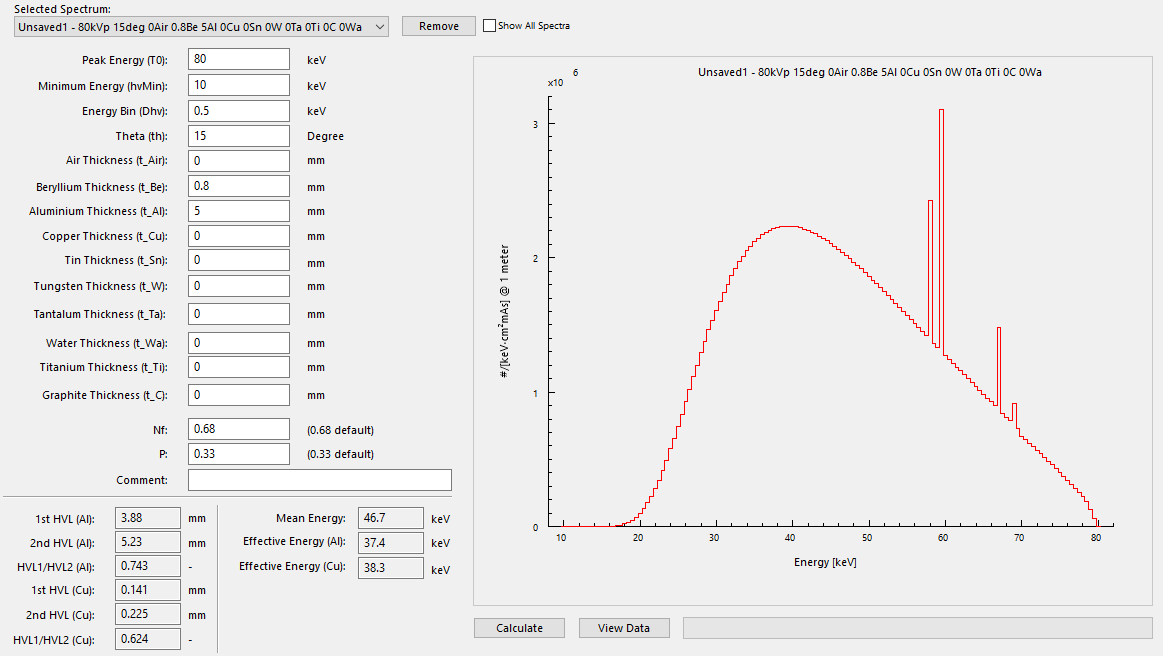

In [1]:
# Se importan todas las librerias necesarias para el proyecto
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate
plt.rcParams['figure.figsize'] = [8, 6]

Se guardan los datos arrojados por SpekCalc en un archivo Fluencia.txt, se importan a python y se obtiene nuevamente la gráfica del espectro de fluencia de fotones $\Phi$ en función de la energía $E$

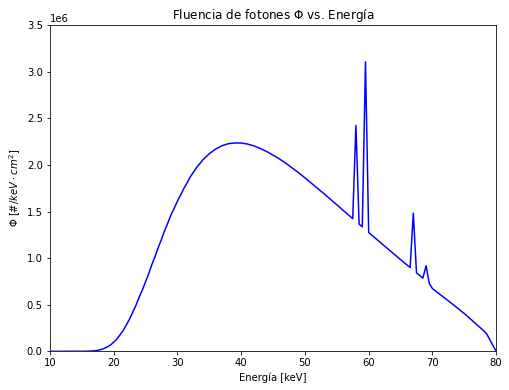

In [2]:
file = 'Fluencia.txt'
data = np.loadtxt(file)
# Se extraen los valores de energía de la columna 1
energia = data[:,0]          # [keV]
# Se extraen los valores de fluencia de fotones de la columna 2
f_fotones = data[:,1]        # N[keV cm^2 mAs]^-1 @ 1 meter

#Se grafica
plt.plot(energia, f_fotones, 'b')
plt.xlabel('Energía [keV]')
plt.ylabel('$\Phi$ $[\#/keV\cdot cm^2]$')
plt.title('Fluencia de fotones $\Phi$ vs. Energía')
plt.axis([10, 80, 0, 3.5E6])
plt.show()

### Punto 2

Una vez obtenida la fluencia de electrones $\Phi$, se obtiene la gráfica del espectro de fluencia de energía $\Psi$ por medio de
$$\Psi_i=\Phi_i\cdot E_i$$

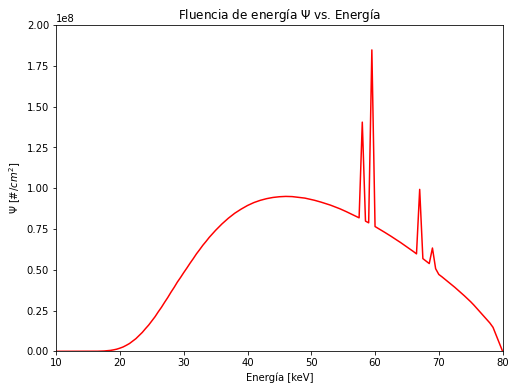

In [3]:
f_energia = energia * f_fotones          # N[cm^2 mAs]^-1 @ 1 meter

# Se grafica
plt.plot(energia, f_energia, 'r')
plt.xlabel('Energía [keV]')
plt.ylabel('$\Psi$ $[\#/ cm^2]$')
plt.title('Fluencia de energía $\Psi$ vs. Energía')
plt.axis([10, 80, 0, 2.0E8])
plt.show()

Se grafican los dos espectros normalizados a su respectiva integral

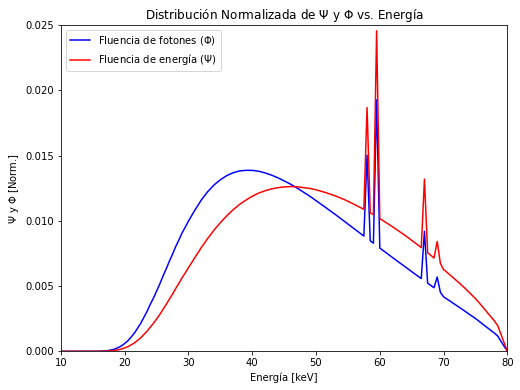

In [4]:
# Se realiza la suma de cada intervalo sobre todo el rango
suma1 = 0
suma2 = 0
for i in range(len(energia)):
    suma1 += f_fotones[i]
    suma2 += f_energia[i]    

#Se grafican las funciones normalizadas a su integral
plt.plot(energia, f_fotones/suma1, 'b',
         energia, f_energia/suma2, 'r')
plt.xlabel('Energía [keV]')
plt.ylabel('$\Psi$ y $\Phi$ [Norm.]')
plt.title('Distribución Normalizada de $\Psi$ y $\Phi$ vs. Energía')
plt.axis([10, 80, 0, 0.025])
plt.legend(["Fluencia de fotones ($\Phi$)", "Fluencia de energía ($\Psi$)"], loc ="best") 
plt.show()

### Punto 3

Se obtienen los valores del coeficiente de absorción másico ($\mu_{ab}/\rho$) para el aire del NIST (https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/air.html), se guardan en un archivo mu_mass_air.txt y mu_Al.txt y se importan para graficar en python

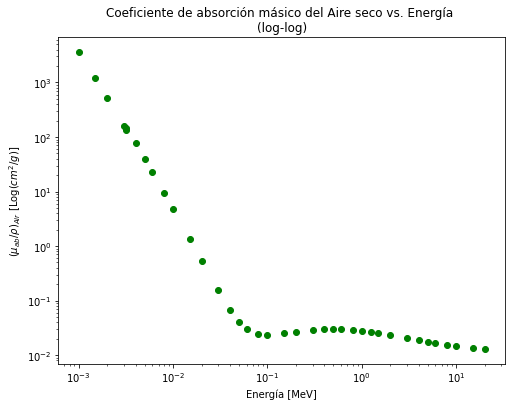

In [5]:
# Se importan los datos
file = 'mu_mass_air.txt'
data = np.loadtxt(file)

# Se extraen los valores de energía de la columna 1
energiaM1 = data[:,0]            # [MeV]
# Se extraen los valores del coeficiente de absorción másico de la columna 3
mu_ab_mass_air = data[:,2]      # [cm2/g]

# Se grafica
plt.plot(energiaM1, mu_ab_mass_air, 'o', c='g')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energía [MeV]')
plt.ylabel(r'$(\mu_{ab}/\rho)_{Air}$ [Log($cm^2/g$)]')
plt.title('Coeficiente de absorción másico del Aire seco vs. Energía \n(log-log)')
plt.show()

### Punto 4

Se obtienen los valores del coeficiente de atenuación másico ($\mu/\rho$) para el aluminio del NIST (https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z13.html), se guardan en un archivo .txt y se importan en python.
Posteriormente se multiplican todos los valores por la densidad del aluminio ($\rho=2.7\,g/cm^3$) para obtener los coeficientes de atenuación lineal $\mu_{Al}$ y se grafican en función de la energía.

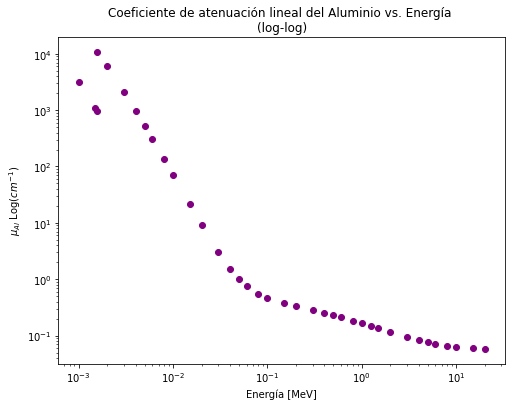

In [6]:
# Se importan los datos
file = 'mu_Al.txt'
data = np.loadtxt(file)

# Se extraen los valores de energía de la columna 1
energiaM2 = data[:,0]            # [MeV]
# Se extraen los valores del coeficiente de atenuación másico de la columna 2
mu_ab_Al = data[:,1]               # [cm2/g]
# Se define la densidad del aluminio
densidad_Al = 2.7                  # [g/cm3]
# Se calculan los valores para el coeficiente de atenuación lineal 
mu_Al = mu_ab_Al * densidad_Al     # [cm-1]

# Se grafica
plt.plot(energiaM2, mu_Al, 'o', c='purple')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energía [MeV]')
plt.ylabel(r'$\mu_{Al}$ Log($cm^{-1}$)')
plt.title('Coeficiente de atenuación lineal del Aluminio vs. Energía \n(log-log)')
plt.show()
# Arreglar gráfica

Finalmente, se grafican los dos espectros en una sola gráfica

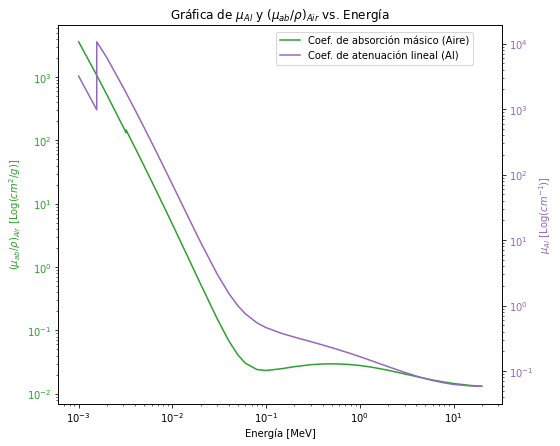

In [7]:
#plt.plot(energiaM1, mu_ab_mass_air, '-', c='g')
#plt.plot(energiaM2, mu_Al, '-', c='purple')

fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Energía [MeV]')
ax1.set_ylabel(r'$(\mu_{ab}/\rho)_{Air}$ [Log($cm^2/g$)]', color=color)
ax1.plot(energiaM1, mu_ab_mass_air, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('$\mu_{Al}$ [Log($cm^{-1}$)]', color=color)  # we already handled the x-label with ax1
ax2.plot(energiaM2, mu_Al, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.title(r'Gráfica de $\mu_{Al}$ y $(\mu_{ab}/\rho)_{Air}$ vs. Energía')
fig.legend(["Coef. de absorción másico (Aire)", "Coef. de atenuación lineal (Al)"], loc='upper right', bbox_to_anchor=(0.83, 0.97)) 
plt.show()

### Punto 5

Se toma el intervalo entre 10 keV y 80 keV del coeficiente de absorción másico del aire  $(\mu_{ab}/\rho)_{Air}$ y el coeficiente de atenuación lineal del aluminio $\mu_{Al}$

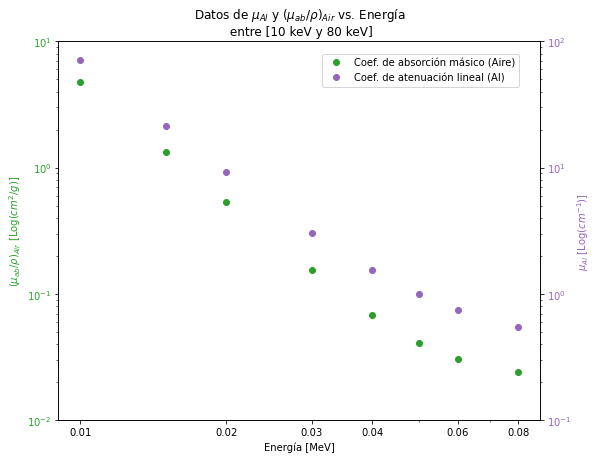

In [8]:
# Se toma la sección de interés de 10 a 80 keV de los coeficientes para aire y aluminio
iE_min, iE_max = 10, 18
En = energiaM1[iE_min : iE_max].copy()
M_Air = mu_ab_mass_air[iE_min : iE_max].copy()
M_Al = mu_Al[iE_min : iE_max].copy()

# Se grafica

fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Energía [MeV]')
ax1.set_ylabel(r'$(\mu_{ab}/\rho)_{Air}$ [Log($cm^2/g$)]', color=color)
ax1.plot(En, M_Air, 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('$\mu_{Al}$ [Log($cm^{-1}$)]', color=color)  # we already handled the x-label with ax1
ax2.plot(En, M_Al, 'o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.title(r'Datos de $\mu_{Al}$ y $(\mu_{ab}/\rho)_{Air}$ vs. Energía''\n entre [10 keV y 80 keV]')
fig.legend(["Coef. de absorción másico (Aire)", "Coef. de atenuación lineal (Al)"], loc='upper right', 
           bbox_to_anchor=(0.91, 0.95)) 

plt.xticks([0.01, 0.02, 0.03, 0.04, 0.06, 0.08],
          [0.01, 0.02, 0.03, 0.04, 0.06, 0.08])

ax1.set_ylim([0.01,10])
ax2.set_ylim([0.1,100])

#plt.plot(En, M_Air, 'o', c='g')
#plt.plot(En, M_Al, 'o', c='purple')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

###### Realizando un ajuste polinómico (grado 2)

Se realiza el ajuste polinómico de los valores de $(\mu_{ab}/\rho)_{air}$ y de $\mu_{Al}$ y se obtiene la gráfica de ambos coeficientes en función de la energía $E$

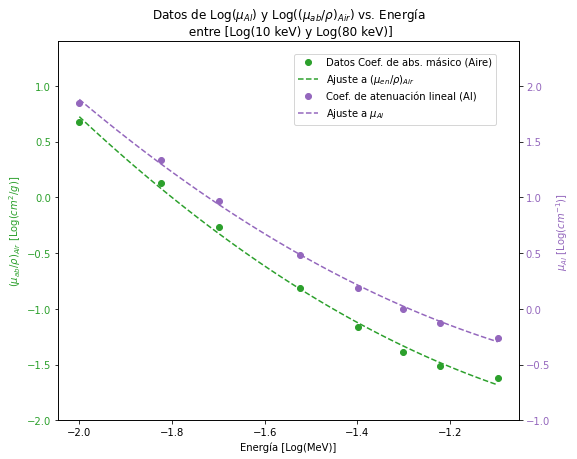

In [9]:
# Se pasan los valores al espacio log-log
x = En.copy()
y = M_Air.copy()
z = M_Al.copy()

for i in range(len(En)):
    x[i] = math.log10(En[i])
    y[i] = math.log10(M_Air[i])
    z[i] = math.log10(M_Al[i])
    
# Se realiza un ajuste a una función de grado 2 
p1 = np.polyfit(x, y, 2)
p2 = np.polyfit(x, z, 2)
#print(p1)
#print(p2)

# Se evalua la función de grado 2 obtenida según los resultados arrojados
X = np.linspace(min(x), max(x), 100)
Y = np.polyval(p1, X)
Z = np.polyval(p2, X)

# Se grafica

fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Energía [Log(MeV)]')
ax1.set_ylabel(r'$(\mu_{ab}/\rho)_{Air}$ [Log($cm^2/g$)]', color=color)
ax1.plot(x, y, 'o', color=color)
ax1.plot(X, Y, '--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('$\mu_{Al}$ [Log($cm^{-1}$)]', color=color)  # we already handled the x-label with ax1
ax2.plot(x, z, 'o', color=color)
ax2.plot(X, Z, '--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(r'Datos de Log($\mu_{Al}$) y Log($(\mu_{ab}/\rho)_{Air}$) vs. Energía''\n entre [Log(10 keV) y Log(80 keV)]')
#plt.axis([10, 80, 0, 0.025])
fig.legend(["Datos Coef. de abs. másico (Aire)", r'Ajuste a $(\mu_{en}/\rho)_{Air}$', 
           "Coef. de atenuación lineal (Al)", "Ajuste a $\mu_{Al}$"], 
           loc='upper right', bbox_to_anchor=(0.87, 0.95)) 

ax1.set_ylim([-2, 1.4])
ax2.set_ylim([-1, 2.4])

#plt.scatter(x, y, c='g')
#plt.scatter(x, z, c='purple')
#plt.plot(X, Y, '--', c='g') 
#plt.plot(X, Z, '--', c='purple')
plt.show()

###### Alternativa interpolando (Esta alternativa no se escoge por complicaciones al calcular el Kerma)

Se realiza la interpolación (cúbica) de los valores de $(\mu_{ab}/\rho)_{air}$ y de $\mu_{Al}$ y se obtiene la gráfica de ambos coeficientes en función de la energía $E$

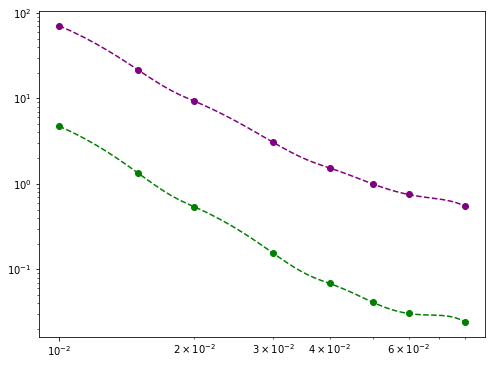

In [10]:
iE_min, iE_max = 10, 18
En = energiaM1[iE_min : iE_max].copy()
M_Air = mu_ab_mass_air[iE_min : iE_max].copy()
M_Al = mu_Al[iE_min : iE_max].copy()

# Se calculan las funciones de interpolación por medio de la función scipy.interpolate.interp1d
intp_air = interpolate.interp1d(En, M_Air, kind='cubic')
intp_Al= interpolate.interp1d(En, M_Al, kind='cubic')

# Se define un rango de energías con una mayor resolución 
energia3 = np.linspace(0.01, 0.08, 100)
# Se grafican las funciones de interpolación
plt.scatter(En, M_Air, c='g')
plt.scatter(En, M_Al, c='purple')
plt.plot(energia3, intp_air(energia3), '--', c='g')
plt.plot(energia3, intp_Al(energia3), '--', c='purple')
plt.xscale('log')
plt.yscale('log')
plt.show()

Nota: Se escoje el método de ajuste polinómico sobre el de interpolación, ya que al calcular el Kerma con la interpolación de $(\mu_{ab}/\rho)_{Al}$, no arroja una función contínua como se espera, sino segmentada.

#### Para el cálculo del denominador (Kerma total) $\sum_{i}^{n}\Psi_i\cdot\left(\frac{\mu_{ab}}{\rho}\right)_{E_i}\cdot\Delta E$

Se grafican los coeficientes $\mu_{Al}$ y $(\mu_{ab}/\rho)_{Air}$ entre 10 keV y 80 keV

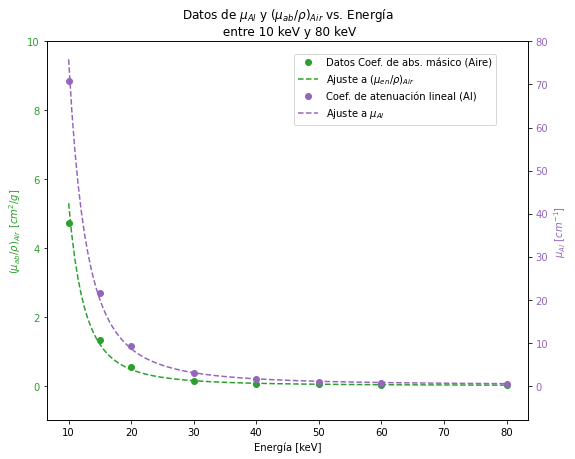

In [11]:
# Se define la función para los coeficientes entre 10 keV y 80 keV con saltos de 0.5 keV 
Ener = energia.copy()
MuAi = np.zeros(len(Ener))
MuAl = np.zeros(len(Ener))

LogEner = np.zeros(len(Ener))
for i in range(len(Ener)):
    LogEner[i] = math.log10(Ener[i]/1000)

for i in range(len(Ener)):
    MuAi[i] = 10**(np.polyval(p1, LogEner[i]))
    MuAl[i] = 10**(np.polyval(p2, LogEner[i]))

# Se grafica
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Energía [keV]')
ax1.set_ylabel(r'$(\mu_{ab}/\rho)_{Air}$ [$cm^2/g$]', color=color)
ax1.plot(En*1000, M_Air, 'o', color=color)
ax1.plot(Ener, MuAi, '--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('$\mu_{Al}$ [$cm^{-1}$]', color=color)  # we already handled the x-label with ax1
ax2.plot(En*1000, M_Al, 'o', color=color)
ax2.plot(Ener, MuAl, '--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(r'Datos de $\mu_{Al}$ y $(\mu_{ab}/\rho)_{Air}$ vs. Energía''\n entre 10 keV y 80 keV')
fig.legend(["Datos Coef. de abs. másico (Aire)", r'Ajuste a $(\mu_{en}/\rho)_{Air}$', 
           "Coef. de atenuación lineal (Al)", "Ajuste a $\mu_{Al}$"], 
           loc='upper right', bbox_to_anchor=(0.87, 0.95)) 

ax1.set_ylim([-1, 10])
ax2.set_ylim([-8, 80])

#plt.scatter(En*1000, M_Air, c='g')
#plt.scatter(En*1000, M_Al, c='purple')
#plt.plot(Ener, MuAi, '--', c='g')
#plt.plot(Ener, MuAl, '--', c='purple')
plt.show()

Se procede a calcular el Kerma desde $10\,keV$ hasta $80\,keV$ en intervalos de $0.5\,keV$ mediante la definición:
$$K_i=\Phi_i\cdot E_i\cdot\left(\frac{\mu_{ab}}{\rho}\right)_{E_i}\cdot\Delta E_i$$
$$K_i=\Psi_i\cdot\left(\frac{\mu_{ab}}{\rho}\right)_{E_i}\cdot\Delta E$$
Fijando $\Delta E=0.5\,keV$.

Y se grafican los espectros normalizados de $K_{Air}$, $\Psi$ y $\Phi$.

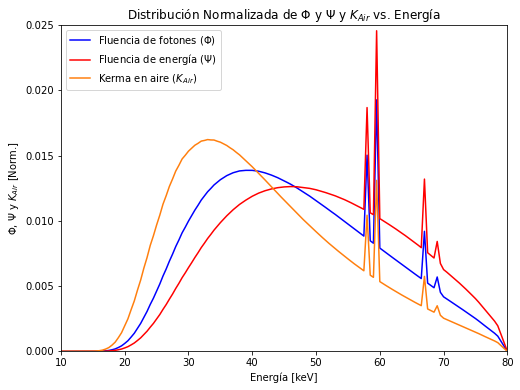

In [12]:
delta_E = 0.5
# Se calcula el kerma en cada intervalo
Ki = f_energia * MuAi * delta_E          # [keV/g]

# Se realiza la suma de cada intervalo sobre todo el rango
suma = 0
for i in range(len(Ener)):
    suma += Ki[i]
    
# Se grafica
plt.plot(Ener, f_fotones/suma1, c='b')
plt.plot(Ener, f_energia/suma2, c='r')
plt.plot(Ener, Ki/suma, c='tab:orange')

plt.xlabel('Energía [keV]')
plt.ylabel('$\Phi$, $\Psi$ y $K_{Air}$ [Norm.]')
plt.title('Distribución Normalizada de $\Phi$ y $\Psi$ y $K_{Air}$ vs. Energía')
plt.axis([10, 80, 0, 0.025])
plt.legend(["Fluencia de fotones ($\Phi$)", "Fluencia de energía ($\Psi$)", "Kerma en aire ($K_{Air}$)"], loc ="best") 
plt.show()

Se realiza la sumatoria del Kerma para todas las energías
$$K=\sum_{i=10}^{80}\Psi_i\cdot\left(\frac{\mu_{ab}}{\rho}\right)_{E_i}\cdot\Delta E_i$$
$$K=\sum_{i=10}^{80}K_i$$

In [13]:
K_tot = 0
for i in range(len(Ki)):
    K_tot += Ki[i]          # [keV/g]
print('La suma del Kerma entre 10 keV y 80 keV es', round(K_tot,2), 'keV/g')

La suma del Kerma entre 10 keV y 80 keV es 235855295.89 keV/g


#### Para el cálculo del numerador (Kerma atenuado) $\sum_{i}^{n}K_i\cdot e^{-\mu_{Al}\cdot t}$

Ahora, se calcula el factor 
$\exp[-(\mu_{Al})_i\cdot t]$
para cada energía entre $10\,keV$ y $80\,keV$ con saltos de $0.5\,keV$.

También se fija un $t$ inicialmente ($t=0.5$).

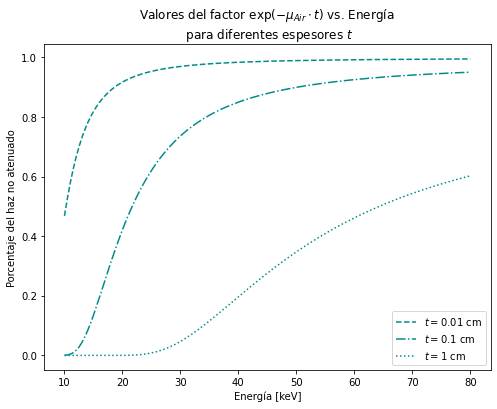

In [14]:
factor = np.zeros(len(Ener))
factor2 = np.zeros(len(Ener))
factor3 = np.zeros(len(Ener))

t = 0.01
for i in range(len(Ener)):
    factor[i] = np.exp(-MuAl[i] * t)
# Se grafica
plt.plot(Ener, factor, '--', c='darkcyan')

t = 0.1
for i in range(len(Ener)):
    factor2[i] = np.exp(-MuAl[i] * t)
# Se grafica
plt.plot(Ener, factor2, '-.', c='darkcyan')

t = 1
for i in range(len(Ener)):
    factor3[i] = np.exp(-MuAl[i] * t)
# Se grafica
plt.plot(Ener, factor3, ':', c='darkcyan')

plt.xlabel('Energía [keV]')
plt.ylabel('Porcentaje del haz no atenuado')
plt.title('Valores del factor $\exp(-\mu_{Air}\cdot t)$ vs. Energía \n para diferentes espesores $t$')
#plt.axis([10, 80, 0, 0.025])
plt.legend(["$t=0.01$ cm", "$t=0.1$ cm","$t=1$ cm"], loc ="lower right") 
plt.show()

Se calcula el valor del Kerma atenuado para el rango de energías mediante
$$K_i^{ate}=K_i\cdot e^{-\mu_i\cdot t}$$

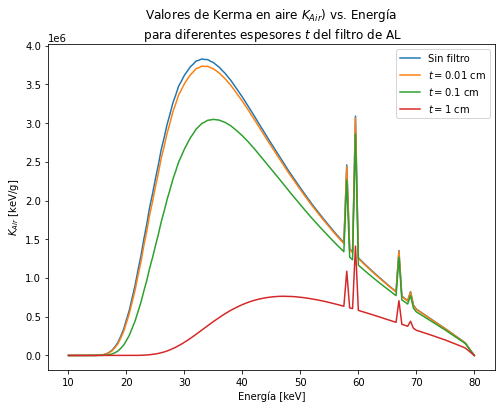

In [15]:
# Se grafica el Kerma sin atenuar
Ki = f_energia * MuAi * delta_E
plt.plot(energia, Ki)

# Se grafica el Kerma atenuado por 0.01 cm de Aluminio
Ki_ate = Ki * factor
plt.plot(energia, Ki_ate) 

# Se grafica el Kerma atenuado por 0.1 cm de Aluminio
Ki_ate = Ki * factor2
plt.plot(energia, Ki_ate) 

# Se grafica el Kerma atenuado por 1 cm de Aluminio
Ki_ate = Ki * factor3
plt.plot(energia, Ki_ate) 

plt.xlabel('Energía [keV]')
plt.ylabel('$K_{Air}$ [keV/g]')
plt.title('Valores de Kerma en aire $K_{Air})$ vs. Energía \n para diferentes espesores $t$ del filtro de AL')
#plt.axis([10, 80, 0, 0.025])
plt.legend(["Sin filtro", "$t=0.01$ cm", "$t=0.1$ cm","$t=1$ cm"], loc ="best") 
plt.show()

Se realiza la sumatoria del Kerma atenuado por 1 cm de aluminio para todas las energías
$$K^{ate}=\sum_{i=10}^{80}K_i\cdot e^{-\mu_{Al}\cdot t}$$
$$K^{ate}=\sum_{i=10}^{80}K_i^{ate}$$

In [16]:
K_ate = 0
for i in range(len(Ki_ate)):
    K_ate += Ki_ate[i]          # [keV/g]

print('La suma del Kerma atenuado con', t,'cm de aluminio entre 10 keV y 80 keV es', round(K_ate,2), 'keV/g')
T = K_ate/K_tot
#print(T)

La suma del Kerma atenuado con 1 cm de aluminio entre 10 keV y 80 keV es 52477060.53 keV/g


Se define la transmisión teórica como $T_{teo}=0.5$ para hallar la primera capa hemirreductora, y se repite el procedimiento de cálculo de la transmisión $T_{calc}$ mostrado en el punto 5, aumentando la profundidad $t$ en pasos de 0.001, desde 0 hasta que el factor $T_{teo}-T_{calc}$ sea menor a una tolerancia definida como 0.001.

In [17]:
T_teo = 0.5
T1 = 0.0
t = 0.0
tolerancia = 0.001

# Se calcula el Kerma sin atenuar (Ki) en el intervalo de energías
Ki = f_energia * MuAi * delta_E

# Se calcula la suma de los Ki sin atenuar
K_tot = 0
for i in range(len(Ki)):
    K_tot += Ki[i]          # [keV/g]

while (abs(T_teo-T1) >= tolerancia):
    t += tolerancia
    
    # Se calcula el Kerma atenuado (Ki_ate) en el intervalo de energías 
    factor = np.zeros(len(Ener))
    for i in range(len(Ener)):
        factor[i] = np.exp(-MuAl[i] * t)
    Ki_ate = Ki * factor

    # Se calcula la suma de los Ki atenuados
    K_ate = 0
    for i in range(len(Ki_ate)):
        K_ate += Ki_ate[i]          # [keV/g]
        
    # Se calcula la transmisión 
    T1 = K_ate/K_tot
    
print('El valor calculado para la HVL1 es', round(t*10,4), 'mm, para una transmisión calculada de', round(T1,4))

El valor calculado para la HVL1 es 3.92 mm, para una transmisión calculada de 0.5003


El valor reportado por SpekCalc para la primera capa hemirreductora es $\text{HVL}_1^{teo}=3.88\,mm$

Ahora, para comparar los valores obtenidos tomamos, el error porcentual $\varepsilon(\%)$ como
$$\varepsilon(\%)=\frac{\left|\text{HVL}_1^{teo}-\text{HVL}_1^{calc}\right|}{\text{HVL}_1^{teo}}\times100$$
Donde:

$\text{HVL}_1^{teo}=3.88\,mm$, es el valor de SpeckCalc de la primera capa hemirreductora en aluminio,

$\text{HVL}_1^{calc}=3.92\,mm$, es el valor que se ha calculado de la primera capa hemirreductora en aluminio,

Reemplazando en la fórmula, se tiene que el error porcentual es $$\varepsilon(\%)=1.03\%$$

### Punto 6

Se define la transmisión teórica como $T_{teo}=0.25$ para hallar la segunda capa hemirreductora, y se repite el procedimiento de cálculo de la transmisión $T_{calc}$ mostrado en el punto 5, aumentando la profundidad $t$ en pasos de 0.001, desde 0 hasta que el factor $T_{teo}-T_{calc}$ sea menor a una tolerancia definida como 0.001.

In [18]:
T_teo = 0.25
T1 = 0.0
t = 0.0
tolerancia = 0.0001

# Se calcula el Kerma sin atenuar (Ki) en el intervalo de energías
Ki = f_energia * MuAi * delta_E
# Se calcula la suma de los Ki sin atenuar
K_tot = 0
for i in range(len(Ki)):
    K_tot += Ki[i]          # [keV/g]

while (abs(T_teo-T1) >= tolerancia):
    t += tolerancia
    
    # Se calcula el Kerma atenuado (Ki_ate) en el intervalo de energías 
    factor = np.zeros(len(Ener))
    for i in range(len(Ener)):
        factor[i] = np.exp(-MuAl[i] * t)
    Ki_ate = Ki * factor

    # Se calcula la suma de los Ki atenuados
    K_ate = 0
    for i in range(len(Ki_ate)):
        K_ate += Ki_ate[i]          # [keV/g]
        
    # Se calcula la transmisión 
    T1 = K_ate/K_tot
    
print('El valor calculado para la HVL2 es', round(t*10,4), 'mm, para una transmisión calculada de', round(T1,4))

El valor calculado para la HVL2 es 9.029 mm, para una transmisión calculada de 0.2501


El valor reportado por SpekCalc para la segunda capa hemirreductora es $\text{HVL}_2^{teo}=5.23\,mm$

Ahora, para comparar los valores obtenidos tomamos, el error porcentual $\varepsilon(\%)$ como
$$\varepsilon(\%)=\frac{\left|\text{HVL}_2^{teo}-\text{HVL}_2^{calc}\right|}{\text{HVL}_2^{teo}}\times100$$
Donde:

$\text{HVL}_2^{teo}=5.23\,mm$, es el valor de SpeckCalc de la primera capa hemirreductora en aluminio,

$\text{HVL}_2^{calc}=5.58\,mm$, es el valor que se ha calculado de la primera capa hemirreductora en aluminio,

Reemplazando en la fórmula, se tiene que el error porcentual entre estos valores es $$\varepsilon(\%)=6.69\%$$

### Punto 7

El valor reportado por SpekCalc para el $\textit{coeficiente de homogeneidad}$ es $\text{HVL}_1^{teo}/\text{HVL}_2^{teo}=0.743\,mm$

El valor calculado por esta rutina para el $\textit{coeficiente de homogeneidad}$ es $\text{HVL}_1^{calc}/\text{HVL}_2^{calc}=0.703\,mm$

El error porcentual entre estos valores es
$$\varepsilon(\%)=\frac{0.743-0.703}{0.743}\times100=5.38\%$$